In [1]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing

#### Dele some ususefull features

In [2]:
df = pd.read_csv("train.csv")
del df['Name']
del df['PassengerId']
del df['Ticket']

#### To analyze the impact of every feature

In [3]:
def probBy(dt, prop):
    data = dt[[prop, 'Survived']].dropna()
    data[prop] = data[prop].values.round()
    totalCount = data.groupby(prop, as_index=False).count()
    survCount = data.groupby(prop, as_index=False).sum()
    totalCount['count'] = totalCount['Survived']
    del totalCount['Survived']
    data = survCount.merge(totalCount)
    data['not'] = data['count'] - data['Survived']
    return data

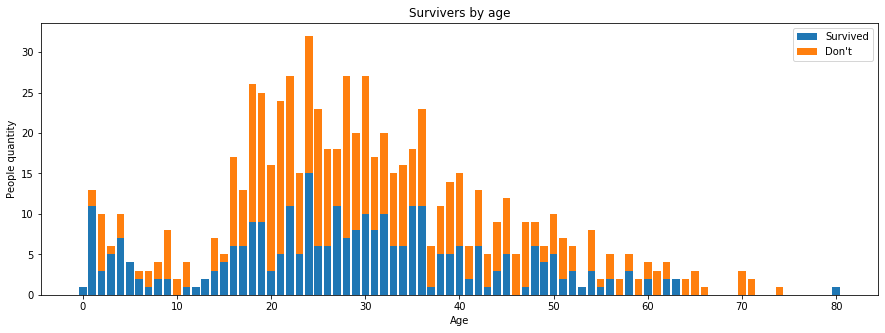

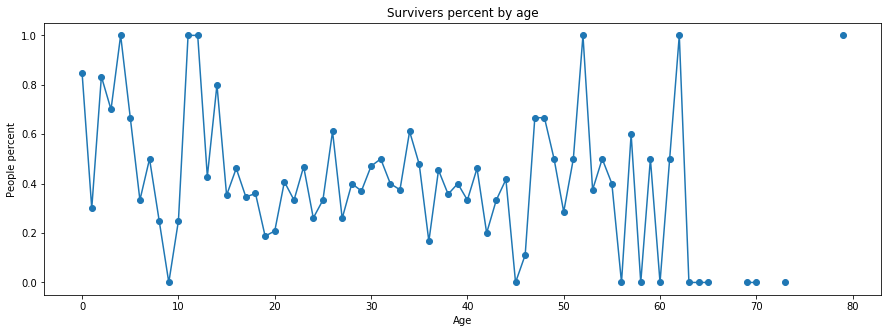

In [4]:
# first plot, survivors by age
fig, ax = plt.subplots(figsize=(15,5))
data = df[['Age', 'Survived']]
data = probBy(df, 'Age')
# data['Age'] = np.sqrt(1+data['Age'].values)
ax.bar(data['Age'], data['Survived'], label='Survived')
ax.bar(data['Age'], data['not'], bottom=data['Survived'], label="Don't")

ax.set_ylabel('People quantity')
ax.set_xlabel('Age')
ax.set_title('Survivers by age')
ax.legend()

plt.show()

# second plot
fig, ax = plt.subplots(figsize=(15,5))

xs = np.arange(max(data['Age']))
data = data.set_index('Age').reindex(xs + 1, fill_value=None)
data['SurvPercent'] = data['Survived']/data['count']

# s1mask = np.isfinite(data['SurvPercent'])

ax.plot(xs, data['SurvPercent'], '-o')

ax.set_ylabel('People percent')
ax.set_xlabel('Age')
ax.set_title('Survivers percent by age')

plt.show()

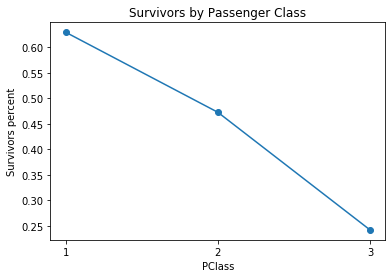

Range: 0.3872671041713812


In [5]:
data = probBy(df, 'Pclass')
data['percent'] = data['Survived']/data['count']
fig, ax = plt.subplots()
ax.plot(data['Pclass'], data['percent'], '-o')

ax.set_xlabel('PClass')
ax.set_ylabel('Survivors percent')
ax.set_title('Survivors by Passenger Class')
ax.set_xticks([1, 2, 3])

plt.show()
print("Range:", max(data['percent']) - min(data['percent']))

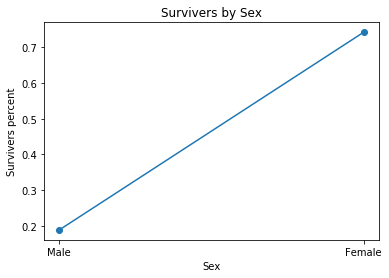

Range: 0.5531300709799203


In [6]:
data = df.copy()
data['Sex'] = (data['Sex'].values == 'female').astype(int)
data = probBy(data, 'Sex')
data['percent'] = data['Survived']/data['count']
fig, ax = plt.subplots()
ax.plot(data['Sex'], data['percent'], '-o')

ax.set_xlabel('Sex')
ax.set_ylabel('Survivers percent')
ax.set_title('Survivers by Sex')
ax.set_xticks(data['Sex'])
ax.set_xticklabels(['Male', 'Female'])

plt.show()
print("Range:", max(data['percent']) - min(data['percent']))

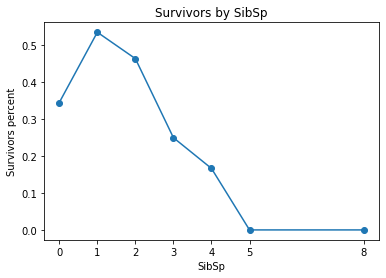

Range: 0.5358851674641149


In [7]:
data = df.copy()
data = probBy(data, 'SibSp')
data['percent'] = data['Survived']/data['count']
fig, ax = plt.subplots()
ax.plot(data['SibSp'], data['percent'], '-o')

ax.set_xlabel('SibSp')
ax.set_ylabel('Survivors percent')
ax.set_title('Survivors by SibSp')
ax.set_xticks(data['SibSp'])
# ax.set_xticklabels(['Female', 'Male'])

plt.show()
print("Range:", max(data['percent']) - min(data['percent']))

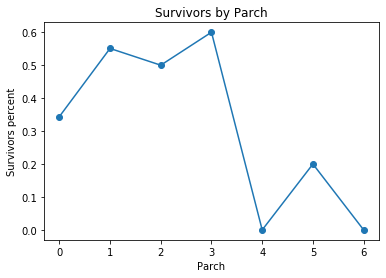

Range: 0.6
[0 1 2 3 4 5 6]


In [8]:
data = df.copy()
data = probBy(data, 'Parch')
data['percent'] = data['Survived']/data['count']
fig, ax = plt.subplots()
ax.plot(data['Parch'], data['percent'], '-o')

ax.set_xlabel('Parch')
ax.set_ylabel('Survivors percent')
ax.set_title('Survivors by Parch')
ax.set_xticks(data['Parch'])
# ax.set_xticklabels(['Female', 'Male'])

plt.show()
print("Range:", max(data['percent']) - min(data['percent']))
print(data['Parch'].unique())

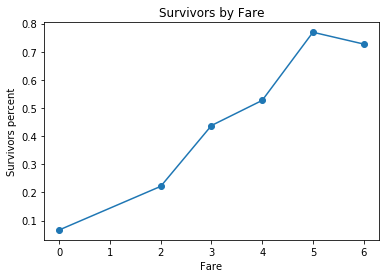

Range: 0.7025641025641026
[0. 2. 3. 4. 5. 6.]


In [9]:
data = df.copy()
data['Fare'] = np.log(1 + data['Fare'].values)
data = probBy(data, 'Fare')
data['percent'] = data['Survived']/data['count']
fig, ax = plt.subplots()
ax.plot(data['Fare'], data['percent'], '-o')

ax.set_xlabel('Fare')
ax.set_ylabel('Survivors percent')
ax.set_title('Survivors by Fare')
# ax.set_xticks(data['Fare'])
# ax.set_xticklabels(['Female', 'Male'])

plt.show()
print("Range:", max(data['percent']) - min(data['percent']))
print(data['Fare'].unique())

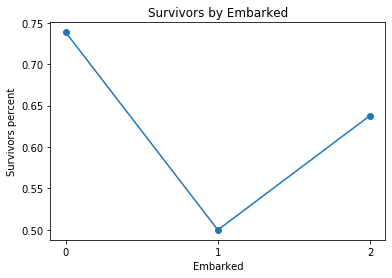

Range: 0.2384615384615385


In [10]:
data = df.copy(['Embarked', 'Survive'])
data = data.dropna()
lblEncoder = preprocessing.LabelEncoder().fit(data['Embarked'])
data['Embarked'] = lblEncoder.transform(data['Embarked'])

data = probBy(data, 'Embarked')
data['percent'] = data['Survived']/data['count']
fig, ax = plt.subplots()
ax.plot(data['Embarked'], data['percent'], '-o')

ax.set_xlabel('Embarked')
ax.set_ylabel('Survivors percent')
ax.set_title('Survivors by Embarked')
ax.set_xticks(data['Embarked'])

plt.show()
print("Range:", max(data['percent']) - min(data['percent']))

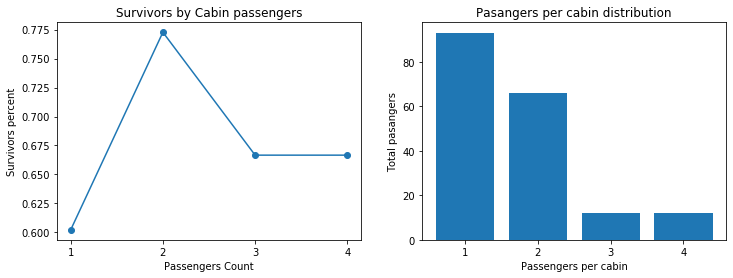

Range: 0.17057673509286408


In [11]:
data = df.copy(['Cabin', 'Survive'])
data = data.dropna()
lblEncoderCabins = preprocessing.LabelEncoder().fit(data['Cabin'])
data['Cabin'] = lblEncoderCabins.transform(data['Cabin'])

data = probBy(data, 'Cabin')
data['passengersCount'] = data['count']
data = data.groupby('count', as_index=False).sum()
data['percent'] = data['Survived']/data['passengersCount']

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(data['count'], data['percent'], '-o')

ax[0].set_xlabel('Passengers Count')
ax[0].set_ylabel('Survivors percent')
ax[0].set_title('Survivors by Cabin passengers')
ax[0].set_xticks(data['count'])

ax[1].bar(data['count'], data['passengersCount'])
ax[1].set_ylabel('Total pasangers')
ax[1].set_xlabel('Passengers per cabin')
ax[1].set_title('Pasangers per cabin distribution')
ax[1].set_xticks(data['count'])

plt.show()
print("Range:", max(data['percent']) - min(data['percent']))

In [12]:
def onlyProbas(dt):
    res = dt.copy()
    data = probBy(res[['Pclass', 'Survived']], 'Pclass')
    data = data['Survived']/data['count']
    res['PclassP'] = data.values[res['Pclass'].values - 1] 
    
    res['Sex'] = (res['Sex'].values == 'female').astype(int)
    data = probBy(res, 'Sex')
    data['percent'] = data['Survived']/data['count']
    res['SexP'] = data['percent'].values[res['Sex'].values - 1] 
    
    data = res[['Age', 'Survived']]
    data = probBy(data, 'Age')
    data['percent'] = data['Survived']/data['count']
    res['Age'] = res['Age'].values.round()
    
    res = res[np.isfinite(res['Age'])]
    data = data[['percent', 'Age']].set_index('Age')
    data = df.copy()
    data = probBy(data, 'SibSp')
    data['percent'] = data['Survived']/data['count']
    res['SibSpP'] = data.set_index('SibSp')['percent'].loc[res['SibSp'].values].values

    data = df.copy()
    data = probBy(data[['Parch', 'Survived']], 'Parch')
    data['percent'] = data['Survived']/data['count']
    res['ParchP'] = data.set_index('Parch')['percent'].loc[res['Parch'].values].values
    
    data = df[['Fare', 'Survived']].copy()
    data['Fare'] = np.log(1 + data['Fare'].values)
    data = probBy(data, 'Fare')
    data['percent'] = data['Survived']/data['count']
    res['Fare'] = np.log(1 + res['Fare'].values).round()
    res['FareP'] = data.set_index('Fare')['percent'].loc[res['Fare'].values].values
    
    del res['Cabin']
    
    data = df.copy(['Embarked', 'Survive'])
    data = data.dropna()
    lblEncoder = preprocessing.LabelEncoder().fit(data['Embarked'])
    data['Embarked'] = lblEncoder.transform(data['Embarked'])

    res = res.dropna()
    data = probBy(data, 'Embarked')
    data['percent'] = data['Survived']/data['count']
    
    res['Embarked'] = lblEncoder.transform(res['Embarked']) 
    res['EmbarkedP'] = data.set_index('Embarked')['percent'].loc[res['Embarked'].values].values
    
    res['Pclass'] = res['Pclass']/3
    res['Age'] = res['Age']/80
    res['SibSp'] = res['SibSp']/max(res['SibSp'])
    return res

probasDS = onlyProbas(df)
probasDS = probasDS.join(pd.get_dummies(probasDS[['Parch']].astype(str)))
del probasDS['Parch']

probasDS = probasDS.join(pd.get_dummies(probasDS[['Embarked']].astype(str)))
del probasDS['Embarked']

probasDS['Fare'] = probasDS['Fare']/6

probasDS = probasDS.values
np.random.shuffle(probasDS)
Ys = probasDS[:,0]
probasDS = probasDS[:,1:]

print("Dataset:", probasDS.shape)
print("Predictions:", Ys.shape)

Dataset: (712, 21)
Predictions: (712,)


In [13]:
def split(arr, fact=0.7):
    splitSize = np.round(len(arr) * fact).astype(int)
    if len(arr.shape) > 1:
        train = arr[:splitSize,:]
        test = arr[splitSize:,:]
    else:
        train = arr[:splitSize]
        test = arr[splitSize:]
        
    return (train, test)

In [14]:
x_train, x_test = split(probasDS)
y_train, y_test = split(Ys)

print("Dataset X:", probasDS.shape)
print("Dataset Y:", Ys.shape, "\n")

print("Test X:", x_test.shape)
print("Test Y:", y_test.shape, "\n")

print("Train X:", x_train.shape)
print("Train Y:", y_train.shape)

Dataset X: (712, 21)
Dataset Y: (712,) 

Test X: (214, 21)
Test Y: (214,) 

Train X: (498, 21)
Train Y: (498,)


## Info

In [15]:
def evaluate(y_pred, y_real):
    return np.sum(y_pred == y_real)/len(y_real)

## Models

#### DNN

In [16]:
# INPUT_SIZE = x_shuffle.shape[1] + 2
INPUT_SIZE = len(probasDS[0])
print('Input size:', INPUT_SIZE)

Input size: 21


In [17]:
# NN
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, input_shape=[INPUT_SIZE], activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 110       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


#### Linear regression (One layer-neuron perceptron)

In [18]:
# 0.8411214953271028 % with probas ds
olnp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=[INPUT_SIZE])
])
olnp.summary()
olnp.compile(optimizer='SGD', loss='mean_squared_error')
olnp.fit(x_train, y_train, batch_size=50, steps_per_epoch=10, epochs=500, verbose=0)

print('One neuron:', evaluate(olnp.predict(x_test).round().squeeze(), y_test), '%')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 22        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
One neuron: 0.7336448598130841 %


#### Ordinary least squares regression

In [19]:
# 0.8271028037383178 % with probas ds
olsr = sm.OLS(y_train, x_train).fit()
y_ols = olsr.predict(x_test)
print('statsmodels:', evaluate(y_ols.round(), y_test), '%')

statsmodels: 0.7523364485981309 %


## My super dataset

## Compile (only or DNN)

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.15):
            print("\nReached 85% accuracy so cancelling training!")
            self.model.stop_training = True

In [21]:
nn.compile(optimizer='SGD', loss='mean_squared_error')

## Train (DNN)

Epoch 1/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2530
Epoch 2/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2512
Epoch 3/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2496
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 0.2494
Epoch 5/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 0.2470
Epoch 7/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2474
Epoch 8/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2466
Epoch 9/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2449
Epoch 10/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 11/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2441
Epoch 12/600
15/15 [==============================] - 0s 2ms/step - loss: 0.2446
Epoch 13/600
15/15 [=================

15/15 [==============================] - 0s 2ms/step - loss: 0.1984
Epoch 103/600
15/15 [==============================] - 0s 2ms/step - loss: 0.1865
Epoch 104/600
15/15 [==============================] - 0s 2ms/step - loss: 0.1938
Epoch 105/600
15/15 [==============================] - 0s 2ms/step - loss: 0.1878
Epoch 106/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 107/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1882
Epoch 108/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1898
Epoch 109/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1904
Epoch 110/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1861
Epoch 111/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1882
Epoch 112/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1883
Epoch 113/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1866
Epoch 114/600
15/15 [=========

Epoch 202/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1634
Epoch 203/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1627
Epoch 204/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1539
Epoch 205/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1618
Epoch 206/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1595
Epoch 207/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1543
Epoch 208/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1654
Epoch 209/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1568
Epoch 210/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1572
Epoch 211/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1593
Epoch 212/600
15/15 [==============================] - 0s 2ms/step - loss: 0.1548
Epoch 213/600
15/15 [==============================] - 0s 2ms/step - loss: 0.1598
Epoch 214/600
15

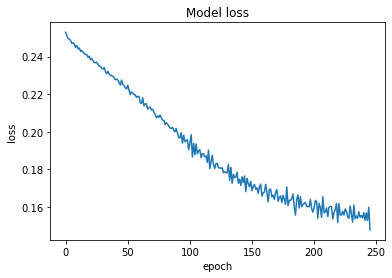

In [22]:
cback = myCallback()
history = nn.fit(probasDS, Ys, batch_size=51, steps_per_epoch=15, epochs=600, callbacks=[cback])
print('Evaluation:')
nn.evaluate(x_test, y_test)

#plot
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Model loss')
plt.show()

## Performance records

In [24]:
def dummyCheck(array, compareBy):
    array = nn.predict(array)

    predictions = map(lambda x: np.squeeze(x).round(), array)
    predictions = np.array(list(predictions))

    return predictions == np.array(compareBy)


# dds = maximize(x_train)
# ddsT = maximize(x_test)

print('Training accuracy:', sum(dummyCheck(x_train, y_train)) / len(y_train), '%')
print('Testing accuracy:', sum(dummyCheck(x_test, y_test)) / len(y_test), '%')
print('Combined accuracy:', sum(dummyCheck(probasDS, Ys)) / len(Ys), '%')

# Categorical probas
# Training accuracy: 0.8393574297188755 %
# Testing accuracy: 0.883177570093458 %
# Combined accuracy: 0.8525280898876404 %

# Probas Dataset
# Training accuracy: 0.8393574297188755 %
# Testing accuracy: 0.8644859813084113 %
# Combined accuracy: 0.8469101123595506 %

# DNN x10 Combined
# Training accuracy: 0.8373493975903614 %
# Testing accuracy: 0.8504672897196262 %

# DNN neurons 10x - p-value optimized
# Training accuracy: 0.8373493975903614 %
# Testing accuracy: 0.8317757009345794 %

# DNN neurons 10x - p-value partial optimized
# Training accuracy: 0.8132530120481928 %
# Testing accuracy: 0.8317757009345794 %

# DNN neurons 10x
# Training accuracy: 0.7951807228915663 %
# Testing accuracy: 0.8271028037383178 %

# DNN 
# Training accuracy: 0.7409638554216867 %
# Testing accuracy: 0.7850467289719626 %

# Linear Regression
# Training accuracy: 0.7871485943775101 %
# Testing accuracy: 0.7850467289719626 %

Training accuracy: 0.7951807228915663 %
Testing accuracy: 0.7523364485981309 %
Combined accuracy: 0.7823033707865169 %


## Saving the model (DNN 10x)

In [212]:
!ls *.h5
# dnn.save('DNN10x_probas_categorical.h5')

DNN10x_and_regressions.h5  DNN10x_probas_categorical.h5  DNN10x_pvalue.h5
DNN10x.h5		   DNN10x_probasDS.h5


## Loading the model

In [20]:
# model = tf.keras.models.load_model('DNN10x_pvalue.h5')

## Make predictions file

In [26]:
def onlyProbas(dt, toApply):
    res = df.copy()
    data = probBy(res[['Pclass', 'Survived']], 'Pclass')
    data = data['Survived']/data['count']
    toApply['Pclass'] = data.values[toApply['Pclass'].values - 1] 
    
    
    toApply['Sex'] = (toApply['Sex'].values == 'male').astype(int)
    res['Sex'] = (res['Sex'].values == 'male').astype(int)
    data = probBy(res, 'Sex')
    data['percent'] = data['Survived']/data['count']
    toApply['Sex'] = data['percent'].values[toApply['Sex'].values - 1] 
    
    data = res[['Age', 'Survived']]
    data = probBy(data, 'Age')
    data['percent'] = data['Survived']/data['count']
    toApply['Age'] = toApply['Age'].values.round()
    
    res = res[np.isfinite(res['Age'])]
    data = data[['percent', 'Age']].set_index('Age')
    toApply['Age'] = data.loc[toApply['Age'].values].values

    data = df.copy()
    data = probBy(data, 'SibSp')
    data['percent'] = data['Survived']/data['count']
    toApply['SibSp'] = data.set_index('SibSp')['percent'].loc[toApply['SibSp'].values].values
    
    data = df.copy()
    data = probBy(data[['Parch', 'Survived']], 'Parch')
    data['percent'] = data['Survived']/data['count']
    tmpParchs = toApply['Parch'].values
    tmpParchs[tmpParchs > 6] = 6
    toApply['Parch'] = tmpParchs
    toApply['Parch'] = data.set_index('Parch')['percent'].loc[toApply['Parch'].values].values
    
    data = df[['Fare', 'Survived']].copy()
    data['Fare'] = np.log(1 + data['Fare'].values)
    data = probBy(data, 'Fare')
    data['percent'] = data['Survived']/data['count']
    toApply['Fare'] = np.log(1 + toApply['Fare'].values).round()
    data = data.append({'Fare': 1.0, 'percent': (0.066667+0.221591)/2,
                'Survived':0, 'count':0, 'not':0}, ignore_index=True)   
    toApply['Fare'] = data.set_index('Fare')['percent'].loc[toApply['Fare'].values].values
    
    del toApply['Cabin']
    
    data = df.copy(['Embarked', 'Survive'])
    data = data.dropna()
    lblEncoder = preprocessing.LabelEncoder().fit(data['Embarked'])
    data['Embarked'] = lblEncoder.transform(data['Embarked'])

    res = res.dropna()
    data = probBy(data, 'Embarked')
    data['percent'] = data['Survived']/data['count']
    
    toApply['Embarked'] = lblEncoder.transform(toApply['Embarked']) 
    toApply['Embarked'] = data.set_index('Embarked')['percent'].loc[toApply['Embarked'].values].values
    return toApply


dfTesting = pd.read_csv('test.csv')
dfTesting['Survived'] = 0
dfTesting['Age'] = dfTesting['Age'].fillna(df['Age'].append(dfTesting['Age']).mean())
dfTesting['Fare'] = dfTesting['Fare'].fillna(df['Fare'].append(dfTesting['Fare']).mean())

dfTesting['Age'] = dfTesting['Age'].round()
tmpAges = dfTesting['Age'].values
tmpAges[tmpAges==0] = 1
dfTesting['Age'] = tmpAges

tmpAges = dfTesting['Age'].values
tmpAges[tmpAges==67] = 66
dfTesting['Age'] = tmpAges

tmpAges = dfTesting['Age'].values
tmpAges[tmpAges==76] = 74
dfTesting['Age'] = tmpAges

del dfTesting['Name']
del dfTesting['Ticket']
del dfTesting['Survived']
# del dfTesting['PassengerId']

submittedDS = onlyProbas(df, dfTesting)
## substract the passengerId
# assert dfTesting.shape[1]-1 == probasDS.shape[1], 'incompatible {} -> {}'.format(dfTesting.shape-1==probasDS.shape)

submittedDS

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0.242363,0.742038,0.375000,0.345395,0.343658,0.221591,0.500000
1,893,0.242363,0.188908,0.111111,0.535885,0.343658,0.221591,0.637931
2,894,0.472826,0.742038,0.500000,0.345395,0.343658,0.221591,0.500000
3,895,0.242363,0.742038,0.611111,0.345395,0.343658,0.221591,0.637931
4,896,0.242363,0.188908,0.407407,0.535885,0.550847,0.437700,0.637931
...,...,...,...,...,...,...,...,...
413,1305,0.242363,0.742038,0.370370,0.345395,0.343658,0.221591,0.637931
414,1306,0.629630,0.188908,0.357143,0.345395,0.343658,0.769231,0.738462
415,1307,0.242363,0.742038,0.454545,0.345395,0.343658,0.221591,0.637931
416,1308,0.242363,0.742038,0.370370,0.345395,0.343658,0.221591,0.637931


In [224]:
def probasCategorical(dt, toApply):
    res = df.copy()
    data = probBy(res[['Pclass', 'Survived']], 'Pclass')
    data = data['Survived']/data['count']
    toApply['PclassP'] = data.values[toApply['Pclass'].values - 1] 
    
    
    toApply['Sex'] = (toApply['Sex'].values == 'male').astype(int)
    res['Sex'] = (res['Sex'].values == 'male').astype(int)
    data = probBy(res, 'Sex')
    data['percent'] = data['Survived']/data['count']
    toApply['SexP'] = data['percent'].values[toApply['Sex'].values - 1] 
    
    data = res[['Age', 'Survived']]
    data = probBy(data, 'Age')
    data['percent'] = data['Survived']/data['count']
    toApply['Age'] = toApply['Age'].values.round()
    
    res = res[np.isfinite(res['Age'])]
    data = data[['percent', 'Age']].set_index('Age')
    toApply['AgeP'] = data.loc[toApply['Age'].values].values

    data = df.copy()
    data = probBy(data, 'SibSp')
    data['percent'] = data['Survived']/data['count']
    toApply['SibSpP'] = data.set_index('SibSp')['percent'].loc[toApply['SibSp'].values].values
    
    data = df.copy()
    data = probBy(data[['Parch', 'Survived']], 'Parch')
    data['percent'] = data['Survived']/data['count']
    tmpParchs = toApply['Parch'].values
    tmpParchs[tmpParchs > 6] = 6
    toApply['Parch'] = tmpParchs
    toApply['ParchP'] = data.set_index('Parch')['percent'].loc[toApply['Parch'].values].values
    
    data = df[['Fare', 'Survived']].copy()
    data['Fare'] = np.log(1 + data['Fare'].values)
    data = probBy(data, 'Fare')
    data['percent'] = data['Survived']/data['count']
    toApply['Fare'] = np.log(1 + toApply['Fare'].values).round()
    data = data.append({'Fare': 1.0, 'percent': (0.066667+0.221591)/2,
                'Survived':0, 'count':0, 'not':0}, ignore_index=True)   
    toApply['FareP'] = data.set_index('Fare')['percent'].loc[toApply['Fare'].values].values
    
    del toApply['Cabin']
    
    data = df.copy(['Embarked', 'Survive'])
    data = data.dropna()
    lblEncoder = preprocessing.LabelEncoder().fit(data['Embarked'])
    data['Embarked'] = lblEncoder.transform(data['Embarked'])

    res = res.dropna()
    data = probBy(data, 'Embarked')
    data['percent'] = data['Survived']/data['count']
    
    toApply['Embarked'] = lblEncoder.transform(toApply['Embarked']) 
    toApply['EmbarkedP'] = data.set_index('Embarked')['percent'].loc[toApply['Embarked'].values].values
    
    toApply['Pclass'] = toApply['Pclass']/3
    toApply['Age'] = toApply['Age']/80
    toApply['SibSp'] = toApply['SibSp']/max(toApply['SibSp'])
    
    toApply = toApply.join(pd.get_dummies(toApply[['Parch']].astype(str)))
    del toApply['Parch']

    toApply = toApply.join(pd.get_dummies(toApply[['Embarked']].astype(str)))
    del toApply['Embarked']

    toApply['Fare'] = toApply['Fare']/6
    return toApply


dfTesting = pd.read_csv('test.csv')
print("original shape:", dfTesting.shape)
dfTesting['Survived'] = 0
dfTesting['Age'] = dfTesting['Age'].fillna(df['Age'].append(dfTesting['Age']).mean())
dfTesting['Fare'] = dfTesting['Fare'].fillna(df['Fare'].append(dfTesting['Fare']).mean())

dfTesting['Age'] = dfTesting['Age'].round()
tmpAges = dfTesting['Age'].values
tmpAges[tmpAges==0] = 1
dfTesting['Age'] = tmpAges

tmpAges = dfTesting['Age'].values
tmpAges[tmpAges==67] = 66
dfTesting['Age'] = tmpAges

tmpAges = dfTesting['Age'].values
tmpAges[tmpAges==76] = 74
dfTesting['Age'] = tmpAges

del dfTesting['Name']
del dfTesting['Ticket']
del dfTesting['Survived']
# del dfTesting['PassengerId']

submittedDS = probasCategorical(df, dfTesting)
## substract the passengerId
assert submittedDS.shape[1]-1 == probasDS.shape[1], 'incompatible {} -> {} (ignore passengerId)'.format(submittedDS.shape, probasDS.shape)

print("final shape:", dfTesting.shape)

submittedDS

original shape: (418, 11)
final shape: (418, 15)


,PassengerId,Pclass,Sex,Age,SibSp,Fare,PclassP,SexP,AgeP,SibSpP,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_0,Embarked_1,Embarked_2
0,892,1.000000,1,0.4250,0.000,0.333333,0.242363,0.742038,0.375000,0.345395,...,1,0,0,0,0,0,0,0,1,0
1,893,1.000000,0,0.5875,0.125,0.333333,0.242363,0.188908,0.111111,0.535885,...,1,0,0,0,0,0,0,0,0,1
2,894,0.666667,1,0.7750,0.000,0.333333,0.472826,0.742038,0.500000,0.345395,...,1,0,0,0,0,0,0,0,1,0
3,895,1.000000,1,0.3375,0.000,0.333333,0.242363,0.742038,0.611111,0.345395,...,1,0,0,0,0,0,0,0,0,1
4,896,1.000000,0,0.2750,0.125,0.500000,0.242363,0.188908,0.407407,0.535885,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1.000000,1,0.3750,0.000,0.333333,0.242363,0.742038,0.370370,0.345395,...,1,0,0,0,0,0,0,0,0,1
414,1306,0.333333,0,0.4875,0.000,0.833333,0.629630,0.188908,0.357143,0.345395,...,1,0,0,0,0,0,0,1,0,0
415,1307,1.000000,1,0.4750,0.000,0.333333,0.242363,0.742038,0.454545,0.345395,...,1,0,0,0,0,0,0,0,0,1
416,1308,1.000000,1,0.3750,0.000,0.333333,0.242363,0.742038,0.370370,0.345395,...,1,0,0,0,0,0,0,0,0,1


#### Headers will be match with the following order (only for "onlyProbas" dataset)
Pclass   ->    Sex   ->    Age  ->   SibSp  ->   Parch   ->   Fare  ->   Embarked

In [28]:
dfResult = pd.DataFrame()
dfResult['PassengerId'] = submittedDS['PassengerId']

del submittedDS['PassengerId']

submittedDS = submittedDS.values
assert len(submittedDS[0]) == nn.input_shape[1]

# 0.2894736842105263 % will be survive
# 0.4044943820224719 % survived in real data

# with probas dataset:
# 0.2822966507177033 % will be survive

# with probas/categorical dataset
# 0.2966507177033493 % will be survive

dfResult['Survived'] = nn.predict(submittedDS).round().astype(int)

print(dfResult['Survived'].sum()/len(dfResult['Survived']), '% will be survive')

dfResult.to_csv('probas_cateorical.csv', index=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices